<a href="https://colab.research.google.com/github/FuriouStyles/DS-Unit-2-Applied-Modeling/blob/master/module3/Stephen_P_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Model Interpretation 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

If you have not yet completed an initial model yet for your portfolio project, you can do today's assignment using your Tanzania Waterpumps model. An example solution will be provided.

**Multi-class classification** will result in multiple Partial Dependence Plots (one for each class).

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')

train, val = train_test_split(train, train_size=0.8)

In [5]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4081,-117.98,34.07,28.0,441.0,106.0,504.0,108.0,2.9107,152500.0
2178,-117.37,33.19,18.0,975.0,382.0,650.0,286.0,1.9562,192500.0
7418,-118.35,33.95,42.0,1779.0,431.0,1507.0,380.0,2.8892,159800.0
13864,-122.02,37.31,33.0,2563.0,434.0,1230.0,418.0,6.3197,340100.0
11609,-121.28,37.94,35.0,2680.0,634.0,2188.0,611.0,1.9375,56700.0


In [6]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [0]:
target = 'median_house_value'
features = train.columns.drop(target)

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [9]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Gradient Boosting R^2 Score: {r2_score(y_val, y_pred)}')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Gradient Boosting R^2 Score: 0.7912238035074468


(0, 375000)

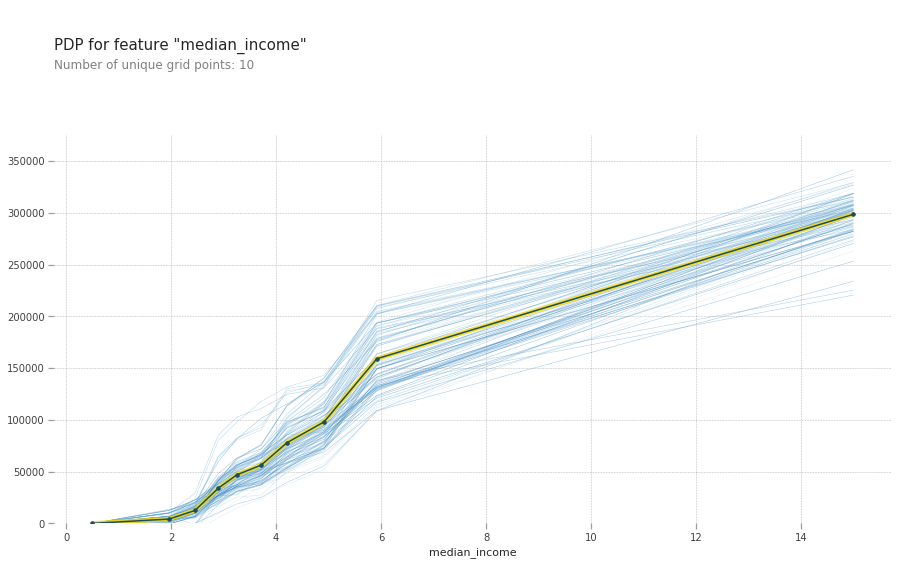

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from pdpbox.pdp import pdp_isolate, pdp_plot

sns.set()
plt.rcParams['figure.dpi'] = 72

feature = 'median_income'

isolated = pdp_isolate(
    model = pipeline,
    dataset = X_val,
    model_features = features,
    feature = feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.ylim(0, 375000)

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbfcd6c9e48>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbfcd7a2780>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


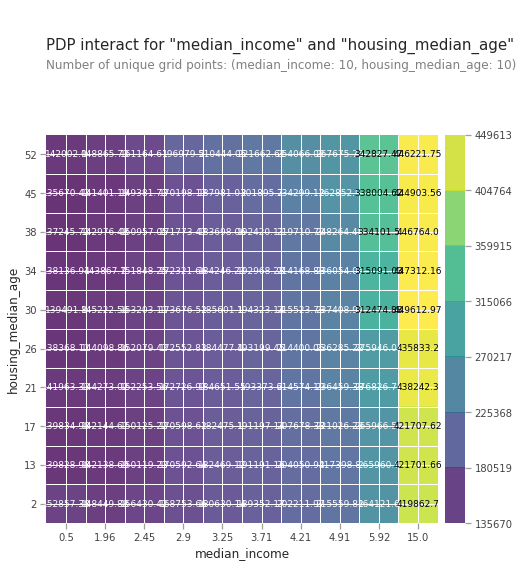

In [19]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feature = ['median_income', 'housing_median_age']

interaction = pdp_interact(
    model = pipeline,
    dataset = X_val,
    model_features = features,
    features = feature
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)